# Import section

All necessary imports should be placed here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Methods

In [2]:
def logistic_map(r, x):
    return r * x * (1 - x)

def generate_orbit(r, x0, num_points):
    orbit = [x0]
    for _ in range(num_points - 1):
        xn = logistic_map(r, orbit[-1])
        orbit.append(xn)
    return np.array(orbit)

# Question 1 and 2
def bifurcation_analysis(start_r, end_r, num_points_per_interval, num_orbit_points):
    bifurcation_data = {'r_values': [], 'x_values': []}

    for r in np.linspace(start_r, end_r, num_points_per_interval):
        orbit = generate_orbit(r, 0.5, num_orbit_points)
        bifurcation_data['r_values'].extend([r] * num_orbit_points)
        bifurcation_data['x_values'].extend(orbit)

    return bifurcation_data

# Question 3
def plot_bifurcation_diagram(bifurcation_data):
    plt.figure(figsize=(10, 6))
    plt.scatter(bifurcation_data['r_values'], bifurcation_data['x_values'], s=1, c='black', marker='.')
    plt.xlabel('r')
    plt.ylabel('x')
    plt.title('Bifurcation Diagram - Logistic Map')
    plt.show()
    
# Part 2
# Lorenz system definition
def lorenz(t, xyz, sigma, beta, rho):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]


## Visualization

In [3]:
# Question 1
start_r1, end_r1 = 0, 2
num_points_per_interval = 500  # Define num_points_per_interval
num_orbit_points = 100
bifurcation_data1 = bifurcation_analysis(start_r1, end_r1, num_points_per_interval, num_orbit_points)

In [4]:
# Question 2
start_r2, end_r2 = 2, 4
bifurcation_data2 = bifurcation_analysis(start_r2, end_r2, num_points_per_interval, num_orbit_points)

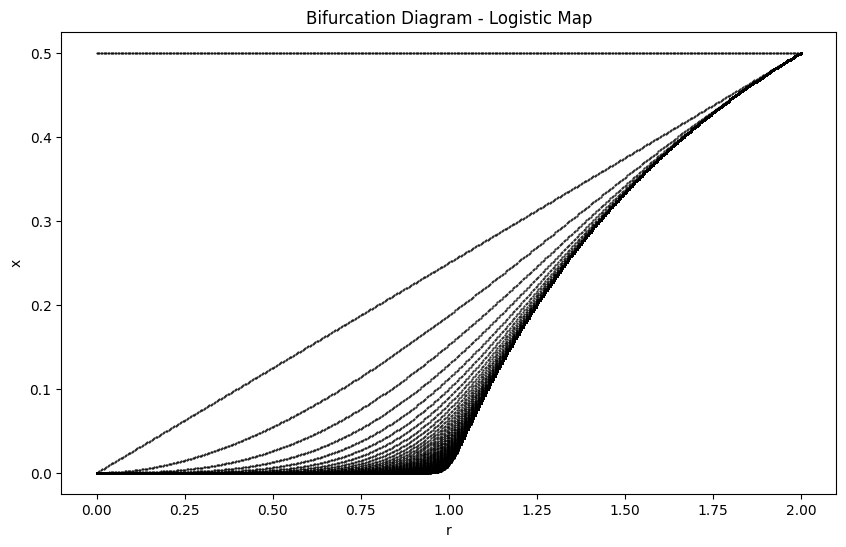

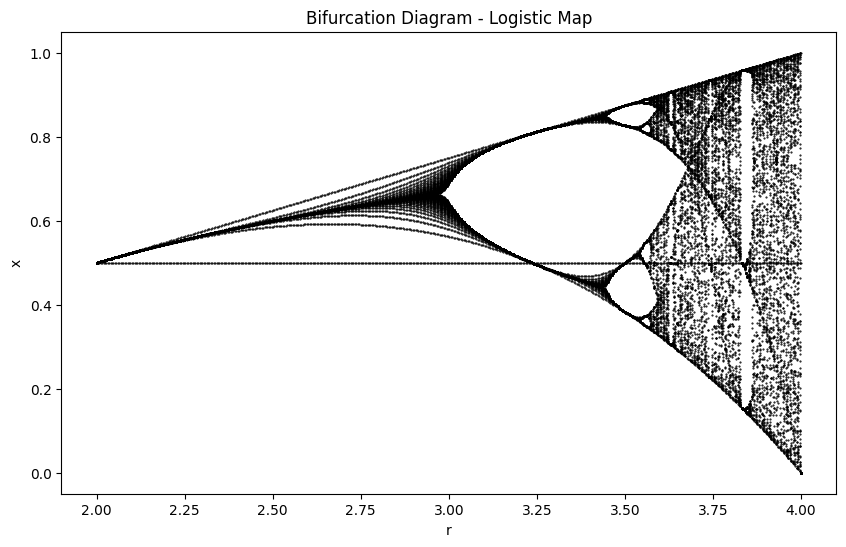

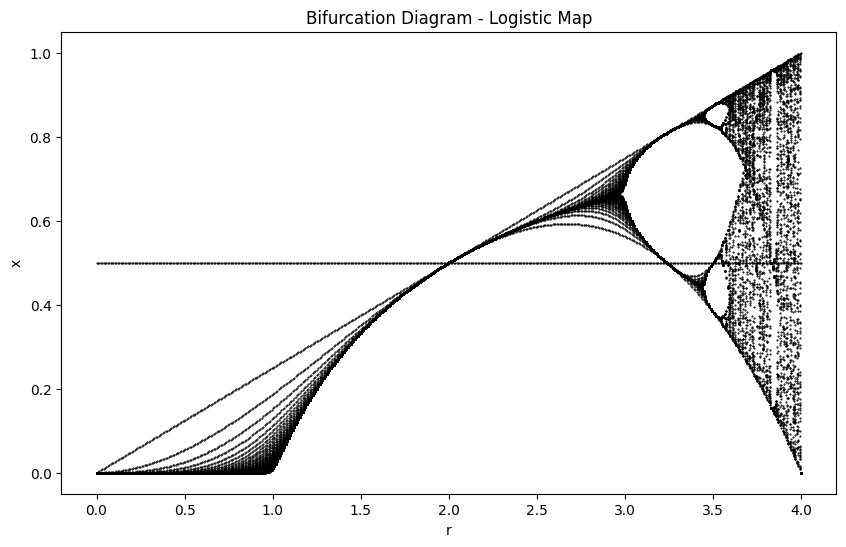

In [8]:
# Plot Bifurcation Diagrams
# Question 3
plot_bifurcation_diagram(bifurcation_data1)
plot_bifurcation_diagram(bifurcation_data2)

start_r3, end_r3 = 0, 4
bifurcation_data3 = bifurcation_analysis(start_r3, end_r3, num_points_per_interval, num_orbit_points)
plot_bifurcation_diagram(bifurcation_data3)


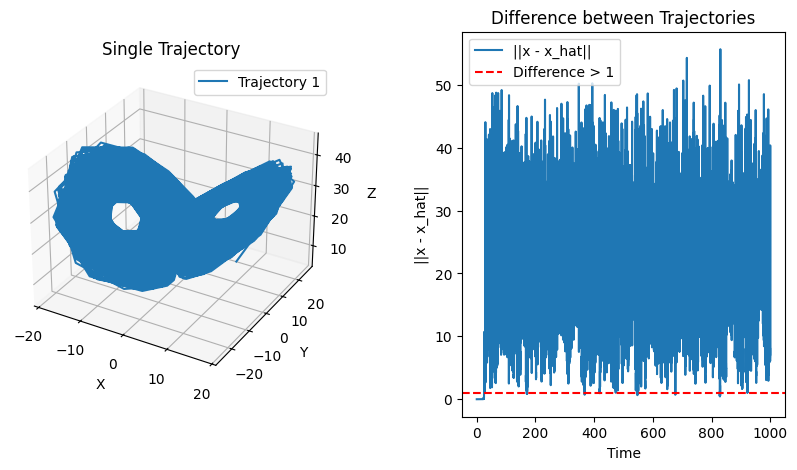

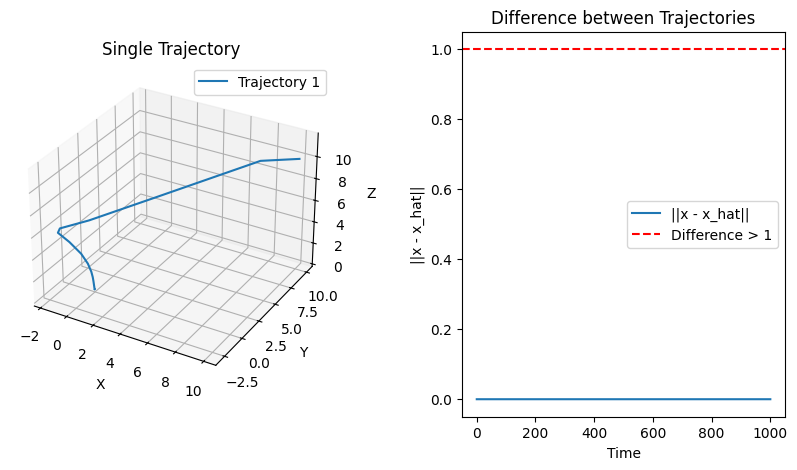

In [11]:
# Part 2
# Simulation parameters
sigma = 10
beta = 8/3
initial_conditions = [10, 10, 10]
initial_conditions_perturbed = [10 + 1e-8, 10, 10]
Tend = 1000

# Run simulations for rho = 28 and rho = 0.5
rhos = [28, 0.5]

for rho in rhos:
    # Simulate trajectories
    sol = solve_ivp(lorenz, [0, Tend], initial_conditions, args=(sigma, beta, rho), dense_output=True)
    sol_perturbed = solve_ivp(lorenz, [0, Tend], initial_conditions_perturbed, args=(sigma, beta, rho), dense_output=True)
    
    # Ensure both trajectories have the same number of points
    t_common = np.linspace(0, Tend, min(len(sol.t), len(sol_perturbed.t)))
    
    # Interpolate both trajectories to the common time grid
    sol_interp = sol.sol(t_common)
    sol_perturbed_interp = sol_perturbed.sol(t_common)
    
    # Plot single trajectory
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot(sol.y[0], sol.y[1], sol.y[2], label='Trajectory 1')
    ax1.set_title('Single Trajectory')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()
    
    # Adjust layout to insert space
    plt.subplots_adjust(wspace=0.4)
    
    # Plot perturbed trajectory and differences
    ax2 = fig.add_subplot(122)
    sol_diff = np.linalg.norm(sol_interp - sol_perturbed_interp, axis=0)
    ax2.plot(t_common, sol_diff, label='||x - x_hat||')
    ax2.axhline(y=1, color='r', linestyle='--', label='Difference > 1')
    ax2.set_title('Difference between Trajectories')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('||x - x_hat||')
    ax2.legend()
    
    plt.show()